<a href="https://colab.research.google.com/github/vamshitn/Samsung-innovation-campus/blob/main/Naive_Bayes_data_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset link http://archive.ics.uci.edu/ml/datasets/Car+Evaluation

http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data

http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.names

In [63]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [65]:
titanic_df = pd.read_csv("/content/data_titanic.csv")
print(titanic_df.info())
print(titanic_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                      

In [66]:
titanic_df = titanic_df.drop(columns=['PassengerId','Name','Ticket','Cabin'], errors='ignore')


In [67]:
X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']

In [69]:
encoder = OrdinalEncoder()
X_encoded = encoder.fit_transform(X)

In [70]:
label_enc = LabelEncoder()
y_encoded = label_enc.fit_transform(y)

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=143)


In [77]:
# Impute missing values in 'Age' with the mean
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)

# Impute missing values in 'Embarked' with the mode
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

# Verify that there are no more missing values
print(titanic_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
None


/tmp/ipython-input-2570407638.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)


In [80]:
roc_auc = roc_auc_score(y_test, y_prob_pred_cnb, multi_class='ovo', average='weighted')
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.9666097361759127


In [81]:
fpr = {}
tpr = {}
thresh = {}

In [82]:

n_class = 2
for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob_pred_cnb[:,i], pos_label=i)

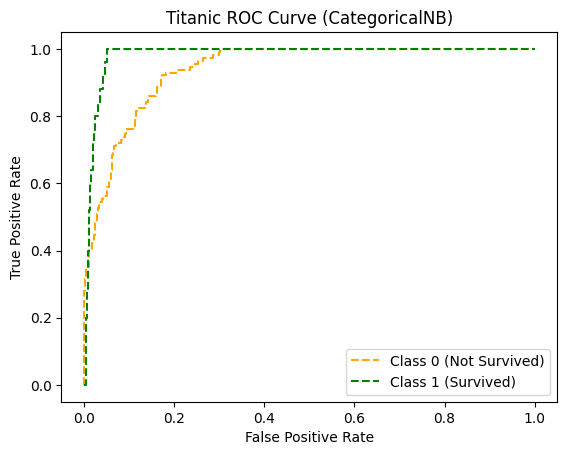

In [83]:

plt.plot(fpr[0], tpr[0], linestyle='--', color='orange', label='Class 0 (Not Survived)')
plt.plot(fpr[1], tpr[1], linestyle='--', color='green', label='Class 1 (Survived)')
plt.title('Titanic ROC Curve (CategoricalNB)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('Titanic_ROC_Curve.png', dpi=300)
plt.show()